# Data Analyst Job Market Analysis(seek.com.au)
This project analyzes 488 job postings for **Data Analyst** roles scraped from seek.com.au.
It explores:
- Hiring trends over time
- Top job categories and types
- Demand across cities and companies

Tools Used: Python,Pandas,Matplotlib,Seaborn

### Data Collection
The dataset was collected by scraping job listings from [seek.com.au](https://www.seek.com.au) using python.
I used libraries such as `requests` and `BeautifulSoup` to extract relevant fields including:
- Job Title
- Company Name
- Location
- Job type
- Min Salary
- Max Salary
- Posting date
- Job Category
The final dataset contains 488 cleaned record and is saved as a CSV file for analysis.

### Data Storage
After scraping and cleaning the data, it was also stored in a SQL database using python's `pyodbc` library.
This allows for easy querying, backup and  integration with other reporting tools if needed.

In [5]:
#Import Libraries 

import pandas as pd
import os
import matplotlib .pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#Load Data
df=pd.read_csv(r'C:\Users\anjal\OneDrive\newpython\webscrsapingautomated\seek_jobs_scraping.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Job_title     449 non-null    object 
 1   Company_name  449 non-null    object 
 2   Location      449 non-null    object 
 3   Job_type      449 non-null    object 
 4   Min_Salary    62 non-null     float64
 5   Max_Salary    55 non-null     float64
 6   Posting_Date  410 non-null    object 
 7   Job_category  449 non-null    object 
dtypes: float64(2), object(6)
memory usage: 28.2+ KB


In [13]:
#Check data type 
df.dtypes

Job_title        object
Company_name     object
Location         object
Job_type         object
Min_Salary      float64
Max_Salary      float64
Posting_Date     object
Job_category     object
dtype: object

In [21]:
# Check null values in data
df.isnull().sum()

Job_title         0
Company_name      0
Location          0
Job_type          0
Min_Salary      387
Max_Salary      394
Posting_Date     39
Job_category      0
dtype: int64

In [19]:
#check duplicate in data
df.duplicated().sum()

0

In [51]:
#convert posting_date to datetime format
df['Posting_Date']=pd.to_datetime(df['Posting_Date'],dayfirst=True,errors='coerce')
df['Posting_Date']=df['Posting_Date']
# extract days from date
df['Days_name']=df['Posting_Date'].dt.strftime('%a')
df['Days_name']=df['Days_name']

In [27]:
warnings.filterwarnings('ignore')

## Job Category Analysis

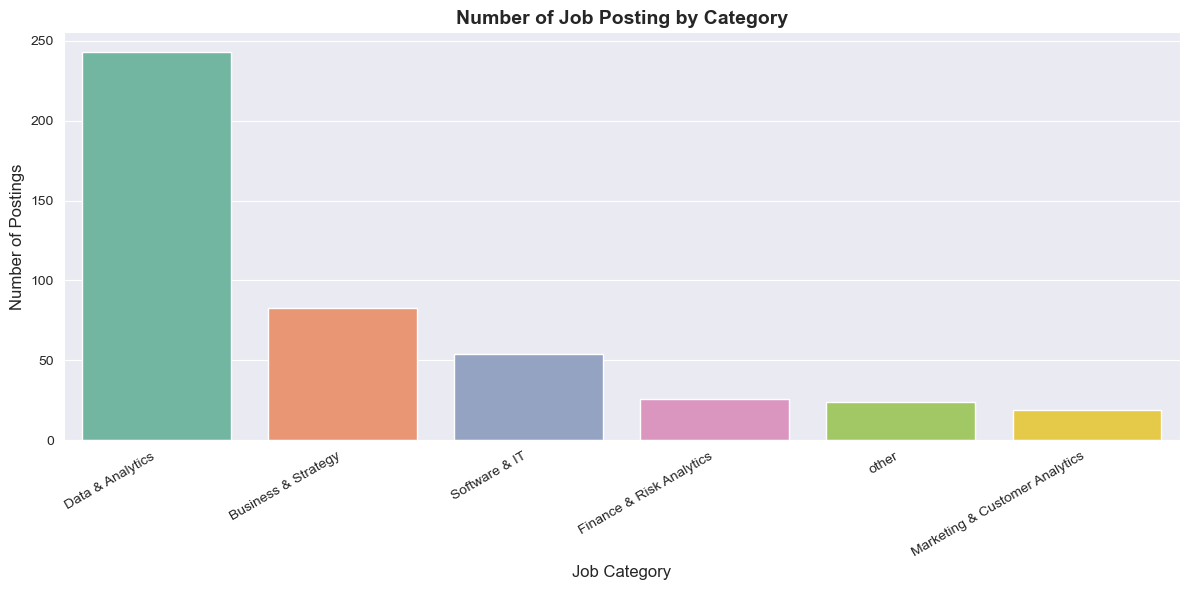

In [29]:
## which job category has highest number of posting

job_count=df['Job_category'].value_counts().reset_index()
job_count.columns=['category','count']

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(data=job_count,x='category',y='count',palette='Set2')
plt.xticks(rotation=30,ha='right')
plt.title('Number of Job Posting by Category',fontsize=14,fontweight='bold')
plt.xlabel('Job Category',fontsize=12)
plt.ylabel('Number of Postings',fontsize=12)
plt.tight_layout()
plt.show()


**Key Insight:**
Data & Analyst is the most in-demand job category with the highest number of postings.

<Figure size 2500x600 with 0 Axes>

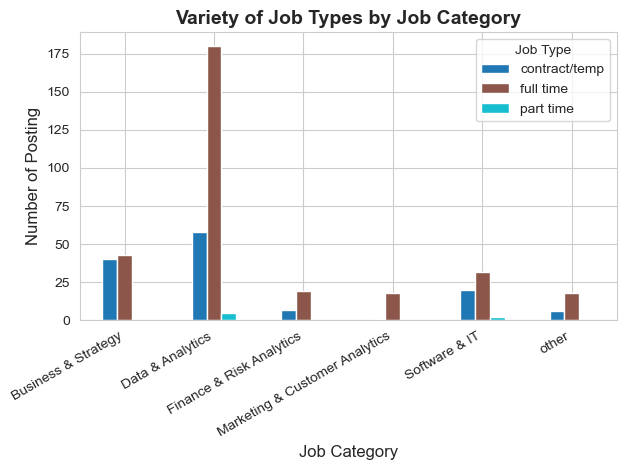

In [31]:
#which job category has the highest variety of job_types
variety=df.groupby(['Job_category','Job_type']).size().unstack(fill_value=0)
sns.set_style('whitegrid')
plt.figure(figsize=(25,6))
variety.plot(kind='bar',colormap='tab10')
plt.title('Variety of Job Types by Job Category',fontsize=14,fontweight='bold')
plt.xlabel('Job Category',fontsize=12)
plt.ylabel('Number of Posting',fontsize=12)
plt.legend(title='Job Type')
plt.xticks(rotation=30,ha='right')
plt.tight_layout()
plt.show()

**Key Insight:**
The Data & Analytics category leads with the highest number of job posting across all job types,escpecially full-time roles.
In comparison, Business& Strategy shows fewer posting and more variation between job types.

## Top Cities Analysis

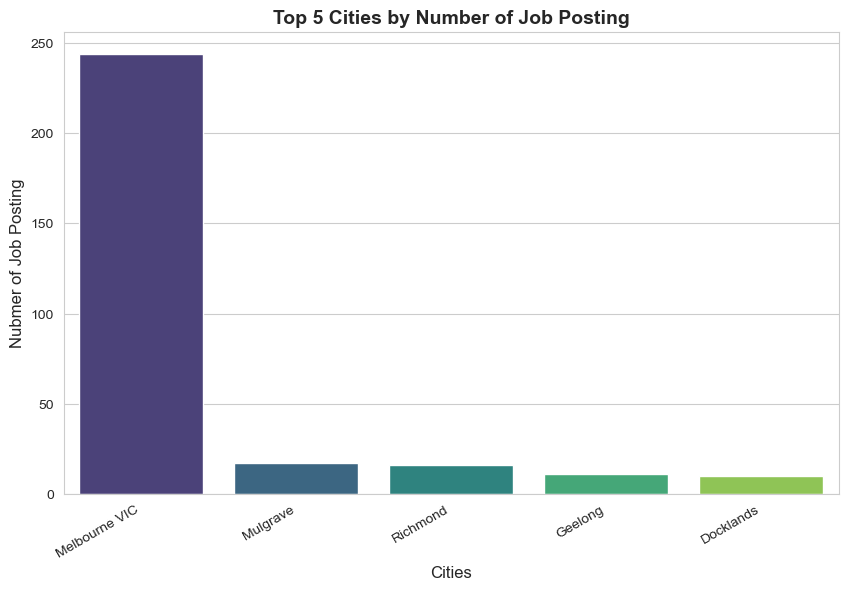

In [37]:
# Top 5 cities
top_cities=df['Location'].value_counts().head(5).reset_index(name='count')
top_cities.columns=['cities','count']

plt.figure(figsize=(10,6))
sns.barplot(top_cities,x='cities',y='count',palette='viridis')
plt.title('Top 5 Cities by Number of Job Posting',fontsize=14,fontweight='bold')
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Nubmer of Job Posting',fontsize=12)
plt.xticks(rotation=30,ha='right')
plt.show()


**Key Insight:**
Melbourne VIC,Mulgrave and Richmond are the top cities with the most job opportunities.

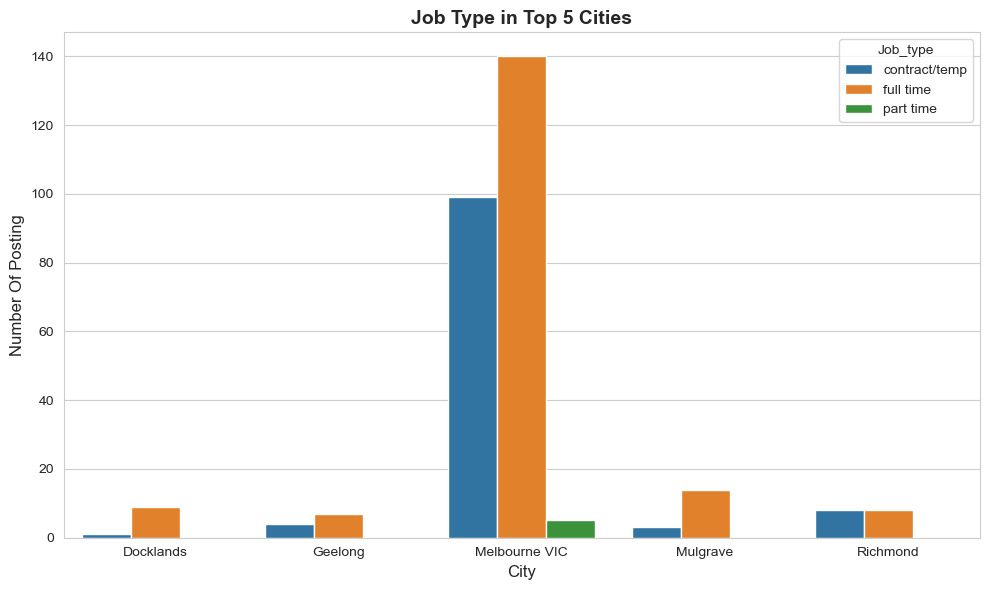

In [35]:
#which cities have the most job posting in each type
top_cities=df['Location'].value_counts().head(5).index
filterdf=df[df['Location'].isin(top_cities)]
city_job_type=filterdf.groupby(['Location','Job_type']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(city_job_type,x='Location',y='count',hue='Job_type')
plt.title('Job Type in Top 5 Cities',fontsize=14,fontweight='bold')
plt.xlabel('City',fontsize=12)
plt.ylabel('Number Of Posting',fontsize=12)
plt.tight_layout()
plt.show()

**Key Insight:**
Melbourne VIC stands out with the highest number of job posting across all job types,especially in full-time and contract/temp.
Others cities like Docklands,Geelong,and Mulgrave show very limited job availability in comparison.

## Company Insights

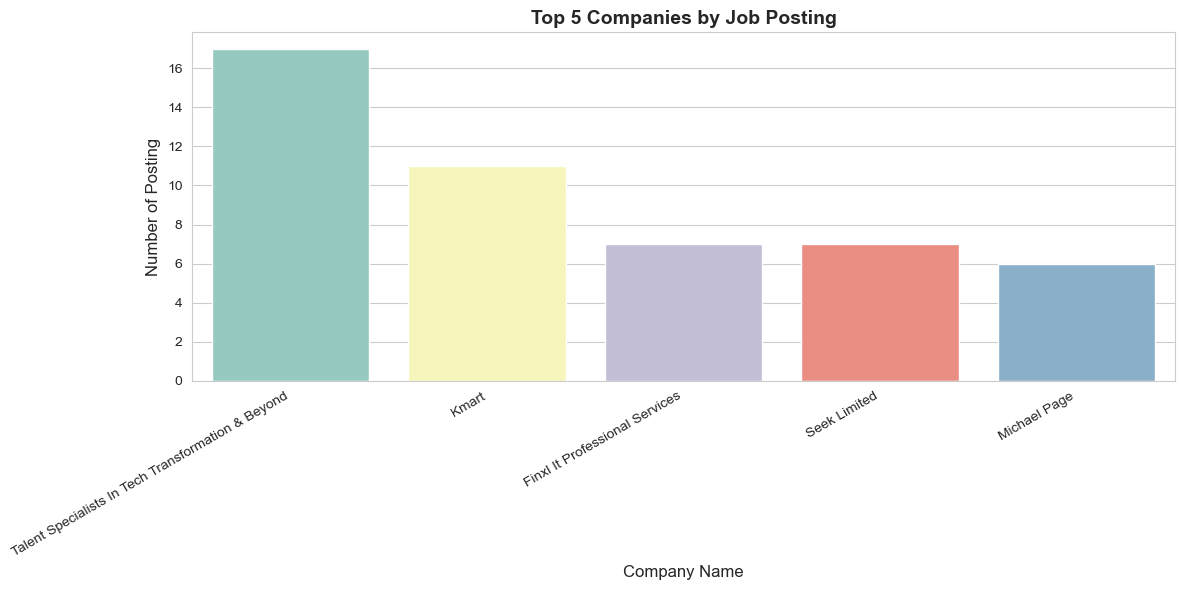

In [39]:
#which companies post the most jobs?
top_company=df['Company_name'].value_counts().head(5).reset_index(name='count')
top_company.columns=['company_name','count']

plt.figure(figsize=(12,6))
sns.barplot(top_company,x='company_name',y='count',palette='Set3')
plt.title('Top 5 Companies by Job Posting',fontsize=14,fontweight='bold')
plt.xlabel('Company Name',fontsize=12)
plt.ylabel('Number of Posting',fontsize=12)
plt.xticks(rotation=30,ha='right')
plt.tight_layout()
plt.show()

**Key Insight:**
Talent Specialists In Tech Trnasformation & Beyond and Kmart are the top hiring companies.

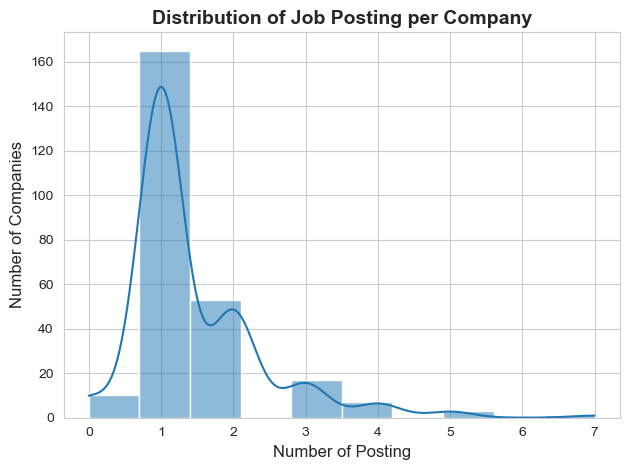

In [45]:
#Distribution of Job Posting Per Company
company_posting_count=df.groupby('Company_name')['Posting_Date'].nunique()

sns.histplot(company_posting_count,bins=10,kde=True)
plt.title('Distribution of Job Posting per Company',fontsize=14,fontweight='bold')
plt.xlabel('Number of Posting',fontsize=12)
plt.ylabel('Number of Companies',fontsize=12)
plt.tight_layout()
plt.show()

**Key Insight:**
Most Companies have posted only 1 or 2 job openings,indicating that hiring is spread across many organization rather than being dominated by a few.
Only a small number of companies have posted 3 or more jobs,showing limited bulk hiring.

## Time Trend Analysis

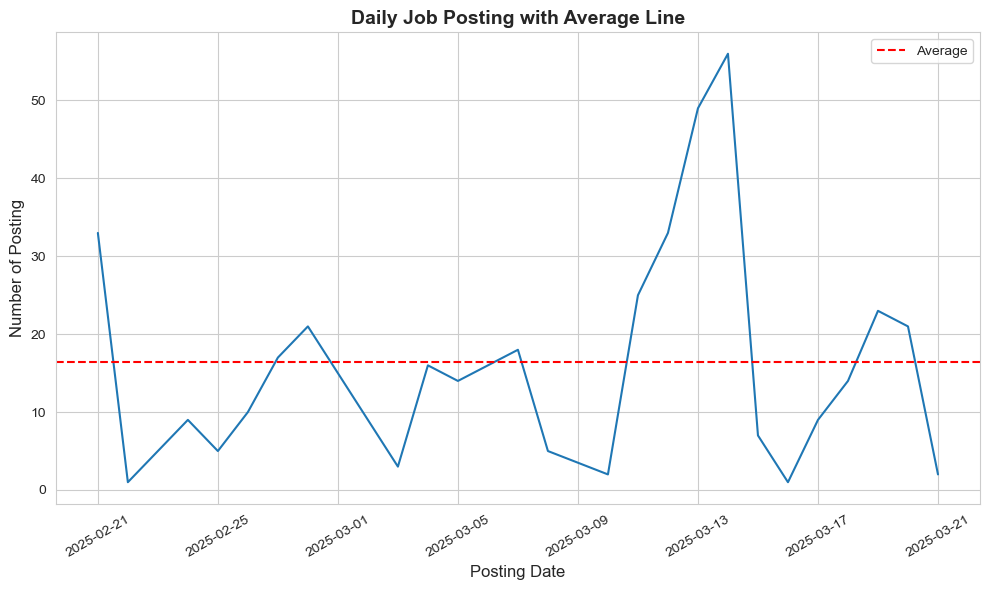

In [49]:
# Daily Job Posting Trend( with Average Line)
avg_posting=df['Posting_Date'].value_counts().mean()

daily_count=df['Posting_Date'].value_counts().reset_index()
daily_count.columns=['Posting_Date','count']
daily_count=daily_count.sort_values('Posting_Date')
plt.figure(figsize=(10,6))
sns.lineplot(data=daily_count,x='Posting_Date',y='count')
plt.axhline(avg_posting,color='red',linestyle='--',label='Average')
plt.title('Daily Job Posting with Average Line',fontsize=14,fontweight='bold')
plt.xlabel('Posting Date',fontsize=12)
plt.ylabel('Number of Posting',fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

**Key Insights:**
The average number of job posting per day is approximately 16,but there is high variation with some days seeing major sikes and others nearly none.

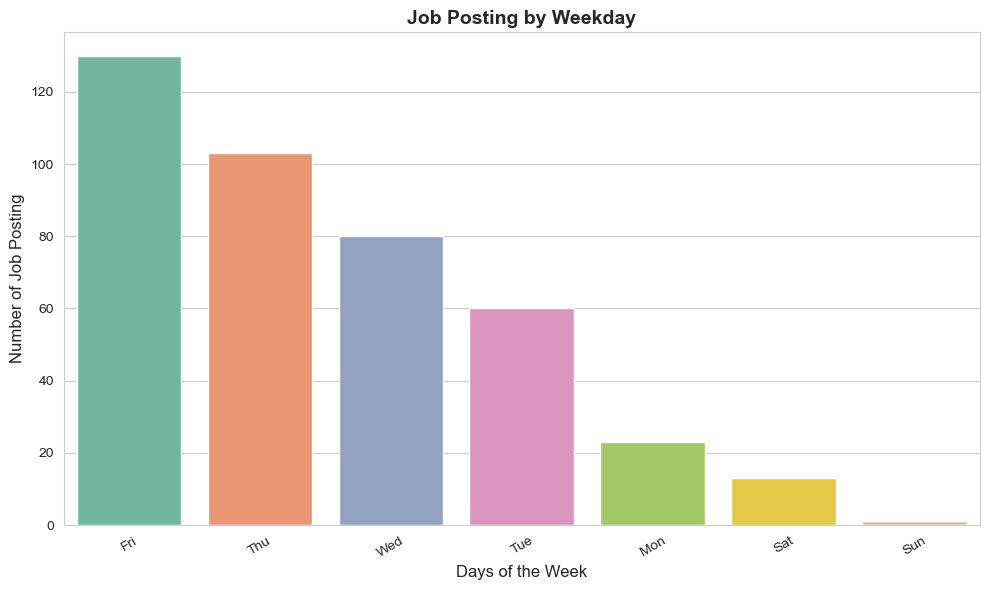

In [53]:
## # Job Posting by weekday
week_days=df.groupby('Days_name')['Posting_Date'].count().sort_values(ascending=False).reset_index(name='count')
week_days.columns=['week_days','count']

plt.figure(figsize=(10,6))
sns.barplot(week_days,x='week_days',y='count',palette='Set2')
plt.title('Job Posting by Weekday',fontsize=14,fontweight='bold')
plt.xlabel('Days of the Week',fontsize=12)
plt.ylabel('Number of Job Posting',fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Key Insight:**
-Friday is the peak day for job posting,followed by thursday and wednesday.
-Job posting spikes during weekdays and drop significantly on weekends

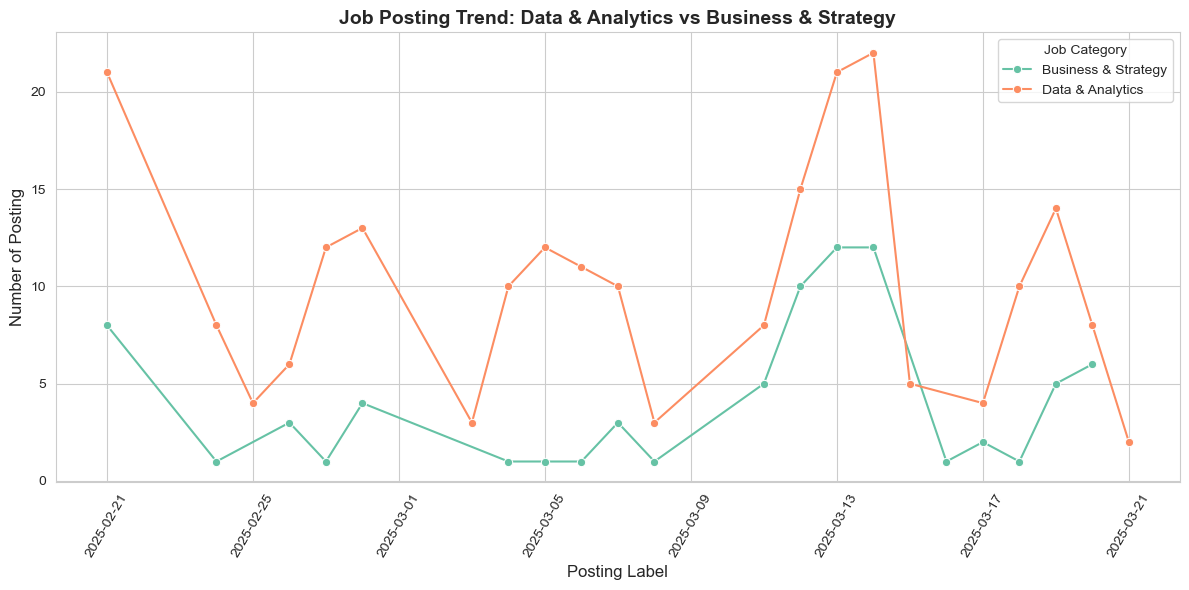

In [59]:
#how has the demand for each data & analytics and business & strategy changed over time
category_role=df[df['Job_category'].str.contains('Data & Analytics|Business & Strategy')]
category_trend=category_role.groupby(['Posting_Date','Job_category']).size().reset_index(name='count')
category_trend.columns=['Posting_Date','Job_category','count']

plt.figure(figsize=(12,6))
sns.set_palette('Set2')
sns.lineplot(category_trend,x='Posting_Date',y='count',hue='Job_category',marker='o')
plt.title('Job Posting Trend: Data & Analytics vs Business & Strategy',fontsize=14,fontweight='bold')
plt.xlabel('Posting Label',fontsize=12)
plt.ylabel('Number of Posting',fontsize=12)
plt.xticks(rotation=60)
plt.legend(title='Job Category')
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Insight:**
Throughout the observed period, Data & Analytics category consistently lead in daily postings with more regular activity
and peaks compared to Business & Strategy.


## Job Type Analysis

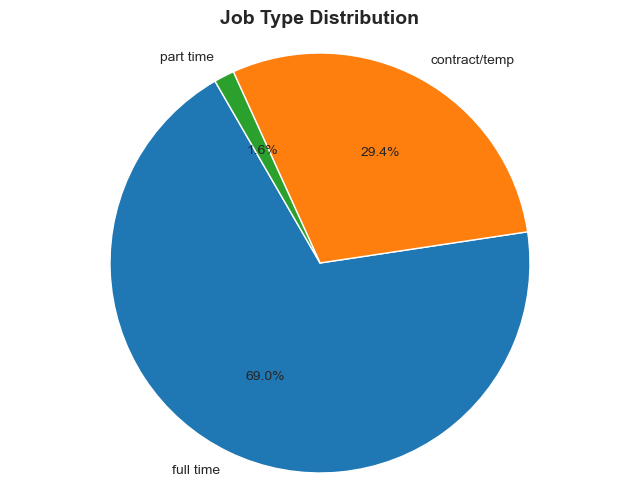

In [57]:
#job type distribution
job_types=df['Job_type'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(job_types,labels=job_types.index,autopct='%1.1f%%',startangle=120)
plt.title('Job Type Distribution',fontsize=14,fontweight='bold')
plt.axis('equal')
plt.show()

**Key Insight:**
-The majority of job posting (69%) are for full time ,followed by contract/temp position(29%).
-Part-time roles make up only a small portion (about 20%),showing that full-time employement is the dominant job type in the data analyst market.

## Conclusion
This analysis give real-world snapshot of the data analyst job market in Victoria,based on 488 scraped job postings from seek.com.au

-Full-time roles dominate the job market,accounting for 69% of total postings.
-Melbourne Vic is the central hub for analyst job opportunities.
-Data & Analytics is the most in demand job category.
-Job postings show daily fluctuations,but average around 16 per day.